In [1]:
import pandas as pd

# List of dataset paths
datasets = [
    r"c:\Users\anwes\Desktop\FakeNews\data\raw\fakenewsnet\gossipcop_fake.csv",
    r"c:\Users\anwes\Desktop\FakeNews\data\raw\fakenewsnet\gossipcop_real.csv",
    r"c:\Users\anwes\Desktop\FakeNews\data\raw\fakenewsnet\politifact_fake.csv",
    r"c:\Users\anwes\Desktop\FakeNews\data\raw\fakenewsnet\politifact_real.csv"
]

# Loop through each dataset and print its columns
for path in datasets:
    df = pd.read_csv(path)
    print(f"Columns in {path.split('\\')[-1]}:")
    print(df.columns.tolist())
    print("-" * 50)


Columns in gossipcop_fake.csv:
['id', 'news_url', 'title', 'tweet_ids']
--------------------------------------------------
Columns in gossipcop_real.csv:
['id', 'news_url', 'title', 'tweet_ids']
--------------------------------------------------
Columns in politifact_fake.csv:
['id', 'news_url', 'title', 'tweet_ids']
--------------------------------------------------
Columns in politifact_real.csv:
['id', 'news_url', 'title', 'tweet_ids']
--------------------------------------------------


In [2]:
import pandas as pd
import re

# Function to clean text
def clean_text(text):
    text = str(text)  # Ensure it's a string
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra whitespace
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    return text

# Paths to datasets
datasets = {
    "gossipcop_fake": r"c:\Users\anwes\Desktop\FakeNews\data\raw\fakenewsnet\gossipcop_fake.csv",
    "gossipcop_real": r"c:\Users\anwes\Desktop\FakeNews\data\raw\fakenewsnet\gossipcop_real.csv",
    "politifact_fake": r"c:\Users\anwes\Desktop\FakeNews\data\raw\fakenewsnet\politifact_fake.csv",
    "politifact_real": r"c:\Users\anwes\Desktop\FakeNews\data\raw\fakenewsnet\politifact_real.csv"
}

# Load and preprocess datasets
all_dfs = []
for label, path in datasets.items():
    df = pd.read_csv(path)
    df['title'] = df['title'].apply(clean_text)  # Clean the title column
    # Add a new column for the label: 0=fake, 1=real
    if "fake" in label:
        df['label'] = 0
    else:
        df['label'] = 1
    all_dfs.append(df[['title', 'label']])  # Keep only relevant columns

# Combine all datasets
combined_df = pd.concat(all_dfs, ignore_index=True)
print(combined_df.head())
print(f"Total samples: {len(combined_df)}")


                                               title  label
0  did miley cyrus and liam hemsworth secretly ge...      0
1  paris jackson  cara delevingne enjoy night out...      0
2  celebrities join tax march in protest of donal...      0
3  cindy crawfords daughter kaia gerber wears a w...      0
4       full list of 2018 oscar nominations  variety      0
Total samples: 23196


In [3]:
# Jupyter Notebook: Combine Fake News Datasets

import pandas as pd
import re

# Function to clean text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"\s+", " ", text).strip()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

# =====================
# Paths to datasets
# =====================
paths = {
    "fakenewsnet": {
        "gossipcop_fake": r"c:\Users\anwes\Desktop\FakeNews\data\raw\fakenewsnet\gossipcop_fake.csv",
        "gossipcop_real": r"c:\Users\anwes\Desktop\FakeNews\data\raw\fakenewsnet\gossipcop_real.csv",
        "politifact_fake": r"c:\Users\anwes\Desktop\FakeNews\data\raw\fakenewsnet\politifact_fake.csv",
        "politifact_real": r"c:\Users\anwes\Desktop\FakeNews\data\raw\fakenewsnet\politifact_real.csv"
    },
    "kaggle": r"c:\Users\anwes\Desktop\FakeNews\data\raw\kaggle\fake_news_dataset.csv",
    "liar": {
        "train": r"c:\Users\anwes\Desktop\FakeNews\data\raw\liar\train.tsv",
        "valid": r"c:\Users\anwes\Desktop\FakeNews\data\raw\liar\valid.tsv",
        "test": r"c:\Users\anwes\Desktop\FakeNews\data\raw\liar\test.tsv"
    }
}

# =====================
# Load FakeNewsNet datasets
# =====================
all_dfs = []
for label, path in paths['fakenewsnet'].items():
    df = pd.read_csv(path)
    df['title'] = df['title'].apply(clean_text)
    df['label'] = 0 if 'fake' in label else 1
    all_dfs.append(df[['title', 'label']].rename(columns={'title':'text'}))

# =====================
# Load Kaggle dataset
# =====================
kaggle_df = pd.read_csv(paths['kaggle'])
# Kaggle dataset columns: 'title', 'text', 'label' (assuming standard)
kaggle_df['text'] = kaggle_df['text'].apply(clean_text)
kaggle_df['label'] = kaggle_df['label'].apply(lambda x: 1 if x=="REAL" or x==1 else 0)
all_dfs.append(kaggle_df[['text','label']])

# =====================
# Load LIAR datasets
# =====================
liar_dfs = []
for split, path in paths['liar'].items():
    df = pd.read_csv(path, sep='\t', header=None)
    # LIAR columns: ['label','statement','subject','speaker','job','state','party','barely_true','false','pants_fire', etc.]
    df.columns = ['label','statement','subject','speaker','job','state','party','barely_true','false','half_true','mostly_true','pants_on_fire'] + [f'extra{i}' for i in range(df.shape[1]-12)]
    # We'll use 'statement' as text
    df['text'] = df['statement'].apply(clean_text)
    # Map LIAR labels to 0=fake, 1=real
    fake_labels = ['pants_on_fire', 'false', 'barely_true']
    real_labels = ['half_true','mostly_true']
    df['label'] = df['label'].apply(lambda x: 0 if x in fake_labels else 1)
    liar_dfs.append(df[['text','label']])
all_dfs.extend(liar_dfs)

# =====================
# Combine all datasets
# =====================
combined_df = pd.concat(all_dfs, ignore_index=True)

# Shuffle dataset
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# =====================
# Explore dataset
# =====================
print(combined_df.head())
print(f"Total samples: {len(combined_df)}")
print(combined_df['label'].value_counts())



                                                text  label
0  down drive adult in join respond important res...      0
1  kathie lee brings crowd to tears with speech a...      1
2  agent outside possible institution enjoy serio...      0
3                                         barelytrue      1
4          situation syria regional refugee response      1
Total samples: 55987
label
1    30232
0    25755
Name: count, dtype: int64


In [4]:
# Save the combined dataset
combined_df.to_csv(r"c:\Users\anwes\Desktop\FakeNews\data\combined_dataset.csv", index=False)
print("Combined dataset saved successfully!")


Combined dataset saved successfully!


In [5]:
import pandas as pd

# Load the combined dataset
df = pd.read_csv(r"c:\Users\anwes\Desktop\FakeNews\data\combined_dataset.csv")
print(df.head())
print(f"Total samples: {len(df)}")
print(df['label'].value_counts())


                                                text  label
0  down drive adult in join respond important res...      0
1  kathie lee brings crowd to tears with speech a...      1
2  agent outside possible institution enjoy serio...      0
3                                         barelytrue      1
4          situation syria regional refugee response      1
Total samples: 55987
label
1    30232
0    25755
Name: count, dtype: int64


In [6]:
print(df.columns)


Index(['text', 'label'], dtype='object')


In [7]:
import pandas as pd
import re

# Load combined dataset
df = pd.read_csv(r"c:\Users\anwes\Desktop\FakeNews\data\combined_dataset.csv")

# Function to clean text
def clean_text(text):
    text = str(text).lower()                     # convert to lowercase
    text = re.sub(r"\s+", " ", text).strip()    # remove extra whitespace
    text = re.sub(r"[^a-z0-9\s]", "", text)     # remove special characters
    return text

# Apply cleaning
df['text_clean'] = df['text'].apply(clean_text)

# Check cleaned data
print(df.head())
print(f"Total samples: {len(df)}")
print(df['label'].value_counts())
print(df.columns)


                                                text  label  \
0  down drive adult in join respond important res...      0   
1  kathie lee brings crowd to tears with speech a...      1   
2  agent outside possible institution enjoy serio...      0   
3                                         barelytrue      1   
4          situation syria regional refugee response      1   

                                          text_clean  
0  down drive adult in join respond important res...  
1  kathie lee brings crowd to tears with speech a...  
2  agent outside possible institution enjoy serio...  
3                                         barelytrue  
4          situation syria regional refugee response  
Total samples: 55987
label
1    30232
0    25755
Name: count, dtype: int64
Index(['text', 'label', 'text_clean'], dtype='object')


In [8]:
# Import libraries
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load combined dataset
df = pd.read_csv(r"c:\Users\anwes\Desktop\FakeNews\data\combined_dataset.csv")

# Check columns
#print(df.columns)
#print(df.head())

# Function to clean text
def clean_text(text):
    text = str(text).lower()                     # convert to lowercase
    text = re.sub(r"\s+", " ", text).strip()    # remove extra whitespace
    text = re.sub(r"[^a-z0-9\s]", "", text)     # remove special characters
    return text

# Apply cleaning
df['text_clean'] = df['text'].apply(clean_text)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df['text_clean'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Check shapes
print(f"Training data shape: {X_train_tfidf.shape}")
print(f"Test data shape: {X_test_tfidf.shape}")
print(f"Training labels distribution:\n{y_train.value_counts()}")
print(f"Test labels distribution:\n{y_test.value_counts()}")
print(df.columns)


Training data shape: (44789, 5000)
Test data shape: (11198, 5000)
Training labels distribution:
label
1    24185
0    20604
Name: count, dtype: int64
Test labels distribution:
label
1    6047
0    5151
Name: count, dtype: int64
Index(['text', 'label', 'text_clean'], dtype='object')


In [9]:
# Import libraries
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load combined dataset
df = pd.read_csv(r"c:\Users\anwes\Desktop\FakeNews\data\combined_dataset.csv")

# Clean text function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"\s+", " ", text).strip()
    text = re.sub(r"[^a-z0-9\s]", "", text)
    return text

# Apply text cleaning
df['text_clean'] = df['text'].apply(clean_text)

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    df['text_clean'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.4f}\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)


Accuracy: 0.9345

Confusion Matrix:
[[4554  597]
 [ 136 5911]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.93      5151
           1       0.91      0.98      0.94      6047

    accuracy                           0.93     11198
   macro avg       0.94      0.93      0.93     11198
weighted avg       0.94      0.93      0.93     11198



In [10]:
df.shape         # Number of rows and columns
print(df.columns)


Index(['text', 'label', 'text_clean'], dtype='object')


In [11]:
df.info()        # Column types, non-null counts 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55987 entries, 0 to 55986
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        55985 non-null  object
 1   label       55987 non-null  int64 
 2   text_clean  55987 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [12]:
df.head()        # First 5 rows

,text,label,text_clean
0,down drive adult in join respond important res...,0,down drive adult in join respond important res...
1,kathie lee brings crowd to tears with speech a...,1,kathie lee brings crowd to tears with speech a...
2,agent outside possible institution enjoy serio...,0,agent outside possible institution enjoy serio...
3,barelytrue,1,barelytrue
4,situation syria regional refugee response,1,situation syria regional refugee response


In [13]:
df.tail()        # Last 5 rows

,text,label,text_clean
55982,barelytrue,1,barelytrue
55983,barelytrue,1,barelytrue
55984,significant something middle fire owner budget...,0,significant something middle fire owner budget...
55985,jennifer garners trainer launched a wellness a...,0,jennifer garners trainer launched a wellness a...
55986,matt leblanc turned down modern family role,1,matt leblanc turned down modern family role


In [14]:
# Drop rows with missing text
df = df.dropna(subset=['text']).reset_index(drop=True)

# Confirm
df.isnull().sum()


text          0
label         0
text_clean    0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(14143)

In [16]:
# Remove duplicates
df = df.drop_duplicates()

# Verify removal
print(df.duplicated().sum())  # Should now be 0
print(len(df))                # Updated total samples


0
41842


In [17]:
# Check basic info
df.info()

# Check first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 41842 entries, 0 to 55984
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        41842 non-null  object
 1   label       41842 non-null  int64 
 2   text_clean  41842 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


,text,label,text_clean
0,down drive adult in join respond important res...,0,down drive adult in join respond important res...
1,kathie lee brings crowd to tears with speech a...,1,kathie lee brings crowd to tears with speech a...
2,agent outside possible institution enjoy serio...,0,agent outside possible institution enjoy serio...
3,barelytrue,1,barelytrue
4,situation syria regional refugee response,1,situation syria regional refugee response


In [18]:
# Count missing values
df.isnull().sum()


text          0
label         0
text_clean    0
dtype: int64

In [19]:
df['label'].value_counts()

print(df.columns)


Index(['text', 'label', 'text_clean'], dtype='object')


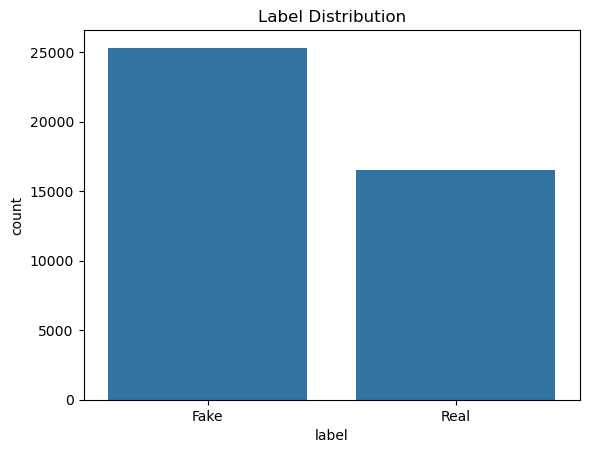

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.xticks([0, 1], ['Fake', 'Real'])
plt.title('Label Distribution')
plt.show()


In [21]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['text'].apply(lambda x: len(str(x)))


In [22]:
df[['word_count', 'char_count']].describe()
print(df.columns)


Index(['text', 'label', 'text_clean', 'word_count', 'char_count'], dtype='object')


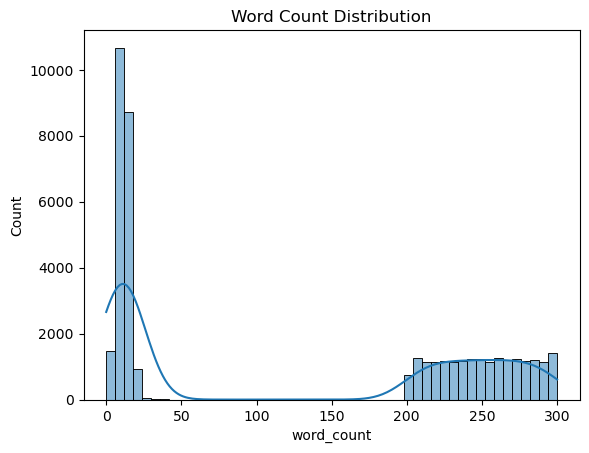

In [23]:
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title('Word Count Distribution')
plt.show()


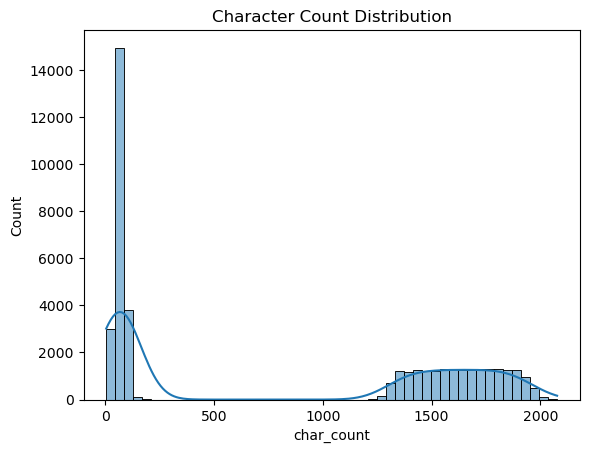

In [24]:
sns.histplot(df['char_count'], bins=50, kde=True)
plt.title('Character Count Distribution')
plt.show()


In [25]:
import nltk
from nltk.corpus import stopwords
#nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

# Remove stopwords from the already cleaned text
df['text_nostop'] = df['text_clean'].apply(
    lambda x: " ".join([w for w in str(x).split() if w not in stop_words])
)

print(df[['text_clean','text_nostop']].head())


                                          text_clean  \
0  down drive adult in join respond important res...   
1  kathie lee brings crowd to tears with speech a...   
2  agent outside possible institution enjoy serio...   
3                                         barelytrue   
4          situation syria regional refugee response   

                                         text_nostop  
0  drive adult join respond important research tr...  
1          kathie lee brings crowd tears speech hoda  
2  agent outside possible institution enjoy serio...  
3                                         barelytrue  
4          situation syria regional refugee response  


In [26]:
from collections import Counter

def get_top_words(texts, n=20):
    # Join all docs into one string → split into tokens
    all_words = " ".join(texts.dropna().astype(str)).split()
    counter = Counter(all_words)
    return counter.most_common(n)

# Fake = label 0, Real = label 1
top_fake = get_top_words(df[df['label']==0]['text_nostop'])
top_real = get_top_words(df[df['label']==1]['text_nostop'])

print("Top 20 words in Fake News:")
print(top_fake)

print("\nTop 20 words in Real News:")
print(top_real)


Top 20 words in Fake News:
[('get', 5389), ('else', 5371), ('child', 5363), ('wear', 5346), ('listen', 5345), ('purpose', 5339), ('marriage', 5337), ('summer', 5331), ('relationship', 5328), ('report', 5327), ('thought', 5325), ('look', 5322), ('direction', 5315), ('inside', 5313), ('lose', 5313), ('factor', 5312), ('ability', 5311), ('wide', 5309), ('leave', 5308), ('size', 5308)]

Top 20 words in Real News:
[('new', 789), ('2018', 634), ('kardashian', 572), ('awards', 551), ('season', 540), ('says', 482), ('star', 472), ('first', 457), ('wedding', 441), ('baby', 434), ('kim', 410), ('best', 396), ('reveals', 393), ('watch', 371), ('prince', 358), ('2017', 347), ('video', 343), ('see', 334), ('meghan', 322), ('stars', 320)]


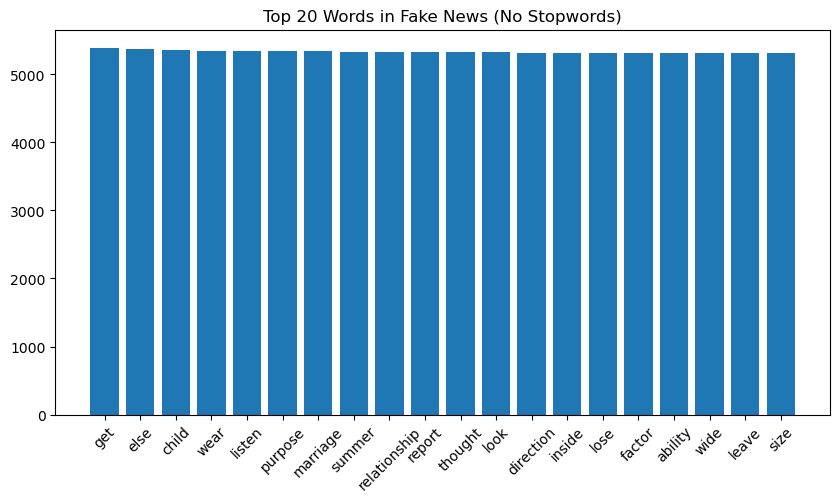

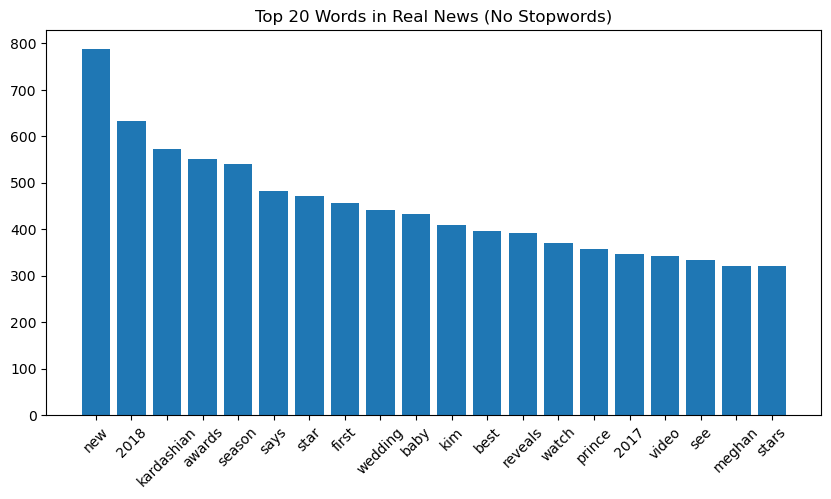

In [27]:
import matplotlib.pyplot as plt

def plot_top_words(word_counts, title):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(10,5))
    plt.bar(words, counts)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

plot_top_words(top_fake, "Top 20 Words in Fake News (No Stopwords)")
plot_top_words(top_real, "Top 20 Words in Real News (No Stopwords)")


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to extract top n-grams
def get_top_ngrams(corpus, ngram_range=(2,2), n=20):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus.dropna().astype(str))
    bag_of_words = vec.transform(corpus.dropna().astype(str))
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return sorted_words[:n]

# Top bigrams in Fake News
fake_bigrams = get_top_ngrams(df[df['label']==0]['text_clean'], (2,2))
# Top bigrams in Real News
real_bigrams = get_top_ngrams(df[df['label']==1]['text_clean'], (2,2))

print("Top 20 Bigrams in Fake News:")
print(fake_bigrams)

print("\nTop 20 Bigrams in Real News:")
print(real_bigrams)


Top 20 Bigrams in Fake News:
[('brad pitt', np.int64(303)), ('angelina jolie', np.int64(206)), ('jennifer aniston', np.int64(202)), ('selena gomez', np.int64(198)), ('kim kardashian', np.int64(195)), ('justin bieber', np.int64(168)), ('meghan markle', np.int64(149)), ('kylie jenner', np.int64(121)), ('blake shelton', np.int64(118)), ('gwen stefani', np.int64(111)), ('kanye west', np.int64(108)), ('taylor swift', np.int64(104)), ('katie holmes', np.int64(103)), ('prince harry', np.int64(90)), ('justin theroux', np.int64(84)), ('caitlyn jenner', np.int64(82)), ('ben affleck', np.int64(77)), ('despite report', np.int64(76)), ('khloe kardashian', np.int64(72)), ('robert pattinson', np.int64(71))]

Top 20 Bigrams in Real News:
[('kim kardashian', np.int64(258)), ('meghan markle', np.int64(203)), ('red carpet', np.int64(194)), ('prince harry', np.int64(162)), ('taylor swift', np.int64(158)), ('kylie jenner', np.int64(153)), ('selena gomez', np.int64(145)), ('khloe kardashian', np.int64(133))

In [29]:
# Top trigrams in Fake News
fake_trigrams = get_top_ngrams(df[df['label']==0]['text_clean'], (3,3))
# Top trigrams in Real News
real_trigrams = get_top_ngrams(df[df['label']==1]['text_clean'], (3,3))

print("Top 20 Trigrams in Fake News:")
print(fake_trigrams)

print("\nTop 20 Trigrams in Real News:")
print(real_trigrams)

Top 20 Trigrams in Fake News:
[('prince harry meghan', np.int64(38)), ('katie holmes jamie', np.int64(34)), ('selena gomez justin', np.int64(34)), ('brad pitt angelina', np.int64(33)), ('kim kardashian kanye', np.int64(33)), ('jennifer aniston justin', np.int64(30)), ('harry meghan markle', np.int64(29)), ('gwen stefani blake', np.int64(27)), ('kardashian kanye west', np.int64(27)), ('holmes jamie foxx', np.int64(25)), ('pitt angelina jolie', np.int64(25)), ('justin bieber selena', np.int64(24)), ('jennifer lopez alex', np.int64(23)), ('stefani blake shelton', np.int64(22)), ('bieber selena gomez', np.int64(22)), ('brad pitt jennifer', np.int64(22)), ('gomez justin bieber', np.int64(21)), ('lopez alex rodriguez', np.int64(20)), ('aniston justin theroux', np.int64(20)), ('kylie jenner travis', np.int64(19))]

Top 20 Trigrams in Real News:
[('billboard music awards', np.int64(62)), ('prince harry meghan', np.int64(57)), ('peoples choice awards', np.int64(46)), ('harry meghan markle', np.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert text into Bag of Words features
vectorizer = CountVectorizer(max_features=5000, ngram_range=(1,2))  # unigrams + bigrams
X_bow = vectorizer.fit_transform(df['text_clean'])

print("Shape of BoW features:", X_bow.shape)


Shape of BoW features: (41842, 5000)


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF representation
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(df['text_clean'])

print("Shape of TF-IDF features:", X_tfidf.shape)


Shape of TF-IDF features: (41842, 5000)


In [32]:
y = df['label']


In [33]:
from sklearn.model_selection import train_test_split

# Using TF-IDF features (better than BoW usually)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (33473, 5000)
Test shape: (8369, 5000)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train Logistic Regression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9116979328474131

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.92      5065
           1       0.84      0.97      0.90      3304

    accuracy                           0.91      8369
   macro avg       0.91      0.92      0.91      8369
weighted avg       0.92      0.91      0.91      8369



In [35]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)

# Evaluation
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8648584060222249

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.88      5065
           1       0.75      0.98      0.85      3304

    accuracy                           0.86      8369
   macro avg       0.87      0.88      0.86      8369
weighted avg       0.89      0.86      0.87      8369



In [36]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9002270283187955

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      5065
           1       0.83      0.94      0.88      3304

    accuracy                           0.90      8369
   macro avg       0.89      0.91      0.90      8369
weighted avg       0.91      0.90      0.90      8369



In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.911698   0.835645  0.966404  0.896281
Naive Bayes          0.864858   0.754152  0.975787  0.850772
Random Forest        0.900227   0.828063  0.943099  0.881845


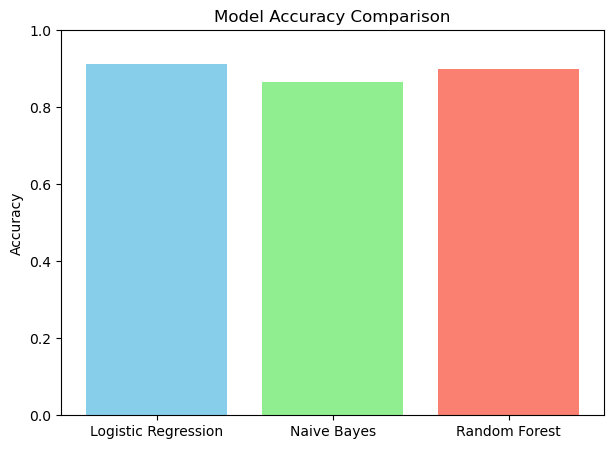

In [38]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Logistic Regression
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Naive Bayes
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Random Forest
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Put all metrics in a table
import pandas as pd

results = pd.DataFrame({
    "Accuracy": [acc_lr, acc_nb, acc_rf],
    "Precision": [prec_lr, prec_nb, prec_rf],
    "Recall": [recall_lr, recall_nb, recall_rf],
    "F1-Score": [f1_lr, f1_nb, f1_rf]
}, index=["Logistic Regression", "Naive Bayes", "Random Forest"])

print(results)

# 🔹 Bar Plot for Accuracies
plt.figure(figsize=(7,5))
plt.bar(results.index, results["Accuracy"], color=['skyblue','lightgreen','salmon'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


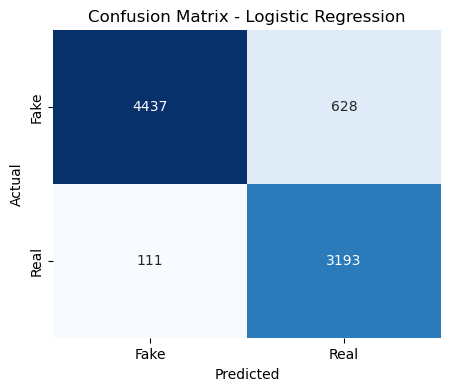

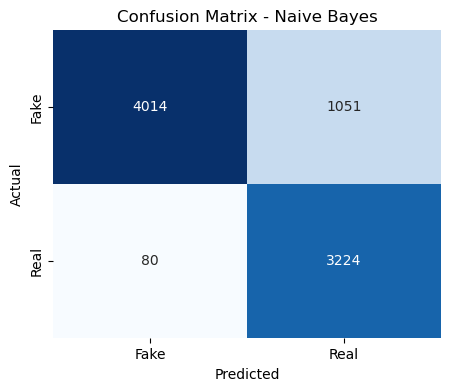

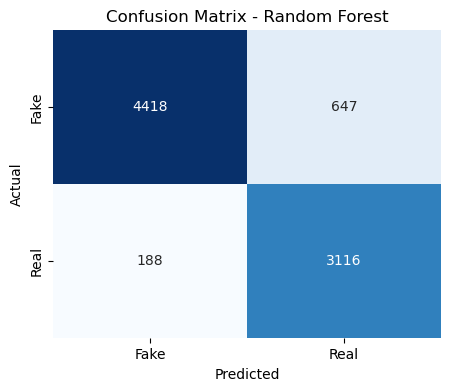

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix heatmap
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False,
                xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Logistic Regression
plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression")

# Naive Bayes
plot_conf_matrix(y_test, y_pred_nb, "Naive Bayes")

# Random Forest
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")


In [41]:
import joblib

# Assume your final ML model is Logistic Regression (or any model you trained)
joblib.dump(lr, "fake_news_model.pkl")

# Also save your vectorizer
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']